In [2]:
import nltk
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# In this method we create cluster for the data and save the generated label to the dataframe to see the result
def train_cluster(nb, x, y):
    X = x[y]
    tfidfvectorizer = TfidfVectorizer(max_features=8000, use_idf=True, stop_words='english',
                                      tokenizer=nltk.word_tokenize)
    tfidfmatrix = tfidfvectorizer.fit_transform(X)
    km = KMeans(n_clusters=nb)
    km.fit(tfidfmatrix)
    x['cluster'] = km.labels_
    return x, tfidfmatrix

# We compute all the metrics we need and put it in a dict to plot it later
def compute_metrics(df, X, gold="cat", cluster="cluster"):
    return {"Silhouette": metrics.silhouette_score(X, df[gold]),
            "Homogeneity": metrics.homogeneity_score(df[gold], df[cluster]),
            "Completeness": metrics.completeness_score(df[gold], df[cluster]),
            "V_measure": metrics.completeness_score(df[gold], df[cluster]),
            'Adjusted rand': metrics.adjusted_rand_score(df[gold], df[cluster])}


# Get the result for 2 to 16 clusters and see what is better
def visualise(df, fr=2, to=16, base="processed_all"):
    res = {}
    for x in range(fr, to + 1):
        result, y = train_cluster(x, df, base)
        data = compute_metrics(result, y)
        res[str(x)] = data
    return res

Here we just concat the processed text to have different option to test

In [4]:
df = pd.read_json("dataframe.json")
df['processed_text_only'] = df['processed_text'].apply(lambda x: " ".join(x[1]))
df['processed_desc_only'] = df['processed_desc'].apply(lambda x: " ".join(x[1]) if x else "")
df['annotated_text_only'] = df['processed_text'].apply(lambda x: " ".join([f"{z}({y})" for z, y in x[0]]))
df['annotated_desc_only'] = df['processed_desc'].apply(lambda x: " ".join([f"{z}({y})" for z, y in x[0]] if x else ""))
df['processed_all'] = df[["processed_text_only", "processed_desc_only"]].apply(" ".join, axis=1)
df['annotated_all'] = df[["annotated_text_only", "annotated_desc_only"]].apply(" ".join, axis=1)
df['all'] = df[["annotated_all", "processed_all"]].apply(" ".join, axis=1)
df.head()

,person,text,processed_text,desc,processed_desc,cat,base,processed_text_only,processed_desc_only,annotated_text_only,annotated_desc_only,processed_all,annotated_all,all
0,Mittarfik Nerlerit Inaat,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,airport(NN) sermersooq(NN) greenland(NN),nerlerit inaat airport greenland mittarfik ner...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...
1,Nerlerit Inaat Lufthavn,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,airport(NN) sermersooq(NN) greenland(NN),nerlerit inaat airport greenland mittarfik ner...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...
2,Constable Pynt Lufthavn,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,airport(NN) sermersooq(NN) greenland(NN),nerlerit inaat airport greenland mittarfik ner...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...
3,Nerlerit Inaat Airport,Nerlerit Inaat Airport (Greenlandic: Mittarfik...,"[[[nerlerit, JJ], [inaat, NN], [airport, NN], ...","airport in Sermersooq, Greenland","[[[airport, NN], [sermersooq, NN], [greenland,...",Airports,Q3049018,nerlerit inaat airport greenland mittarfik ner...,airport sermersooq greenland,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,airport(NN) sermersooq(NN) greenland(NN),nerlerit inaat airport greenland mittarfik ner...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...,nerlerit(JJ) inaat(NN) airport(NN) greenland(N...
4,Red Dog Airport,"Red Dog Airport (IATA: RDB, ICAO: PADG, FAA LI...","[[[red, JJ], [dog, NN], [airport, NN], [iata, ...","airport in Alaska, United States of America","[[[airport, NN], [alaska, NNS], [unit, NN], [s...",Airports,Q4392064,red dog airport iata rdb icao padg faa lid dgg...,airport alaska unit state america,red(JJ) dog(NN) airport(NN) iata(NN) rdb(NN) i...,airport(NN) alaska(NNS) unit(NN) state(NN) ame...,red dog airport iata rdb icao padg faa lid dgg...,red(JJ) dog(NN) airport(NN) iata(NN) rdb(NN) i...,red(JJ) dog(NN) airport(NN) iata(NN) rdb(NN) i...


### We test text + description

<AxesSubplot:>

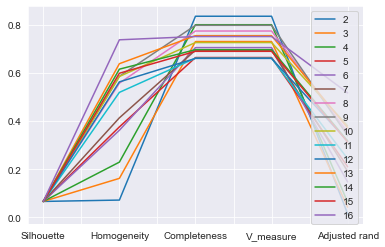

In [5]:
res = visualise(df)
vis = pd.DataFrame.from_dict(res)
vis.plot()

### We test description only

<AxesSubplot:>

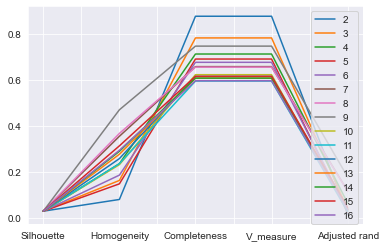

In [6]:
reres = visualise(df, base="processed_desc_only")
revis = pd.DataFrame.from_dict(reres)
revis.plot()

### We test text only

<AxesSubplot:>

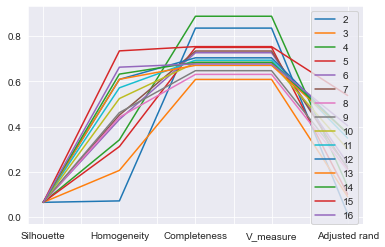

In [7]:
reres = visualise(df, base="processed_text_only")
revis = pd.DataFrame.from_dict(reres)
revis.plot()

### We test text + description but with the tag for each word

<AxesSubplot:>

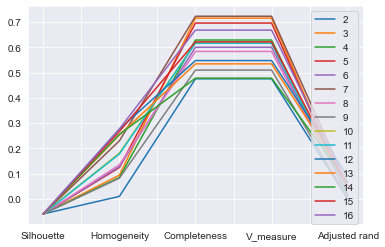

In [8]:
reres = visualise(df, base="annotated_all")
revis = pd.DataFrame.from_dict(reres)
revis.plot()

### We test everything (text + description + text annotated + description annotated)

<AxesSubplot:>

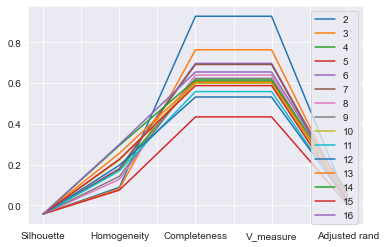

In [9]:
reres = visualise(df, base="all")
revis = pd.DataFrame.from_dict(reres)
revis.plot()